In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def numerical_int(accel_xyz, tdata):
    '''
    This is jsut vanilla integration of whatever you give it, and integrates twice
    E.g. goes from acceleration to position
    
    accel_xyz is a 3x1 vector of all the accelerations in the XYZ for the rows
    '''
    
    ax_vn, ay_vn, az_vn = accel_xyz[0], accel_xyz[1], accel_xyz[2]

    vx_vn, vy_vn, vz_vn = np.zeros(len(ax_vn)),np.zeros(len(ay_vn)), np.zeros(len(az_vn))
    x_vn, y_vn, z_vn = np.zeros(len(ax_vn)),np.zeros(len(ay_vn)), np.zeros(len(az_vn))
    dt = tdata[1]

    vx_vn = integrate.cumtrapz(ax_vn, tdata, initial=0)
    vy_vn = integrate.cumtrapz(ay_vn, tdata, initial=0)
    vz_vn = integrate.cumtrapz(az_vn, tdata, initial=0)

    x_vn = integrate.cumtrapz(vx_vn, tdata, initial=0)
    y_vn = integrate.cumtrapz(vy_vn, tdata, initial=0)
    z_vn = integrate.cumtrapz(vz_vn, tdata, initial=0)
    
    v_vec = [vx_vn, vy_vn, vz_vn]
    x_vec = [x_vn, y_vn, z_vn]
    
    return v_vec, x_vec

In [5]:
################## CONSTANTS ##################
# gravity
g = 9.81  # m/s^2
# m to ft
ft = 3.2884  # ft/m

################## DATA FRAME ##################
datafile = 'LSM_LOG_20220218-162202.csv'
fields = ['Accel X', 'Accel Y', 'Accel Z']

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
tdata = np.linspace(0, 318/208, 318)
L = tdata.shape[0]
# This time is just completely incorrect

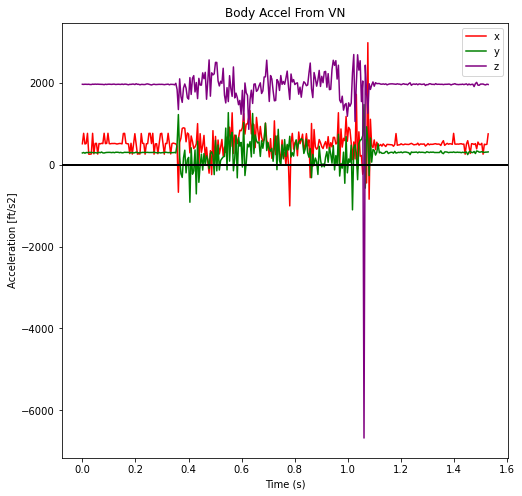

In [8]:
ax_vn = df['Accel X']
ay_vn = df['Accel Y']
az_vn = df['Accel Z']

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, ax_vn, color='red', label='x')
l3 = ax.plot(tdata, ay_vn, color='green', label='y')
l4 = ax.plot(tdata, az_vn, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Body Accel From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [ft/s2]")
ax.legend()
plt.show()